In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sb

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


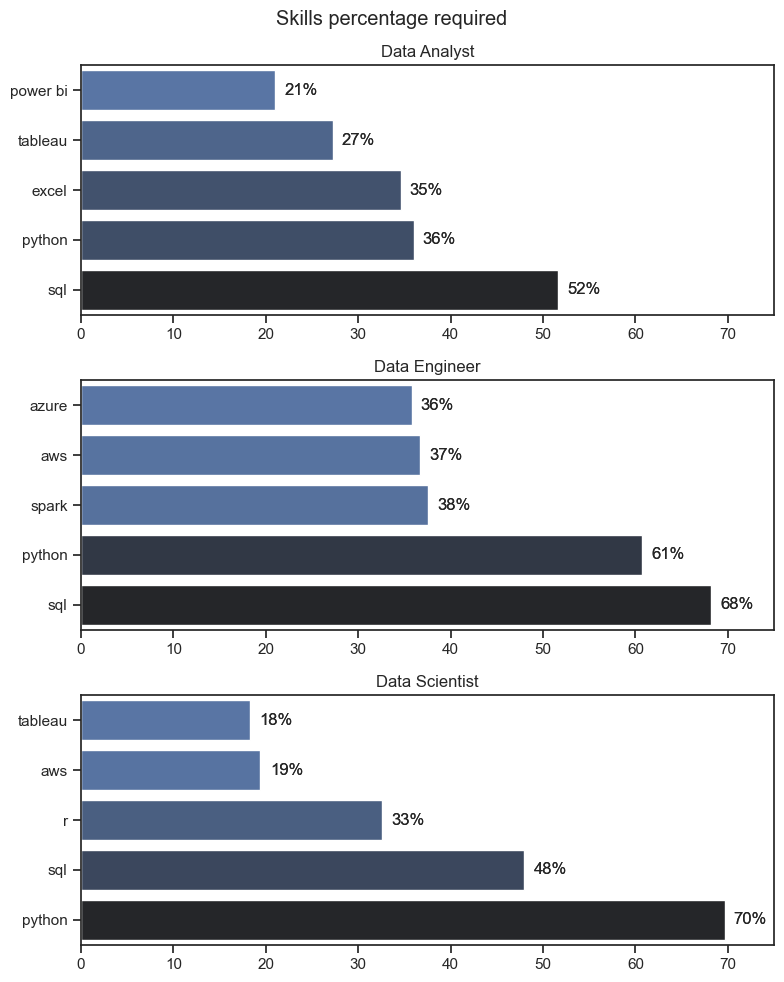

In [ ]:
df_DA_IND = df[df['job_country'] == 'India']
df_skills = df_DA_IND.explode('job_skills')
df_skills = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills = df_skills.reset_index(name='skills_count')
df_skills = df_skills.sort_values(by='skills_count', ascending=False)
job_titles = df_skills['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

df_count = df_DA_IND['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skills_per = pd.merge(df_skills, df_count, how='left', on='job_title_short')
df_skills_per['skill_per'] = 100 * df_skills_per['skills_count'] / df_skills_per['jobs_total']

fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 10))
sb.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_per[df_skills_per['job_title_short'] == job_title].head(5)
    sb.barplot(data=df_plot, x='skill_per', y='job_skills', ax=ax[i], hue='skill_per', palette='dark:b_r')
    ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 75)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_per']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
       # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_per']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
fig.suptitle("Skills percentage required")
fig.tight_layout()
plt.show()
